In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('EnergyProduction.csv', index_col = 'DATE', parse_dates = True)
df.index.freq = 'MS'
print(len(df))
df

240


,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


So df has 240 rows and 1 column. We're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

### 1. Plot the dataset.

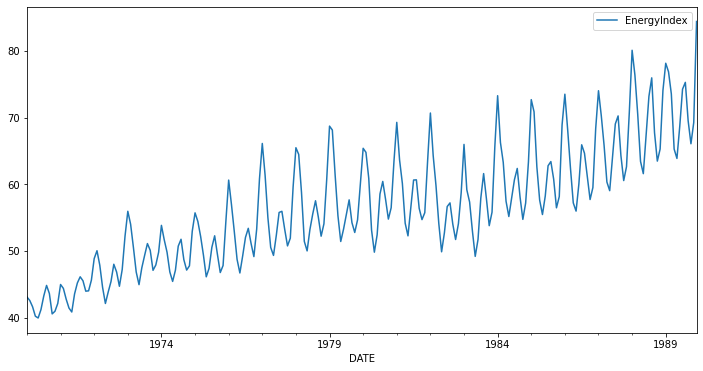

In [4]:
df.plot(figsize = (12, 6));

### 2. Plot the 12-month Simple Moving Average (SMA).

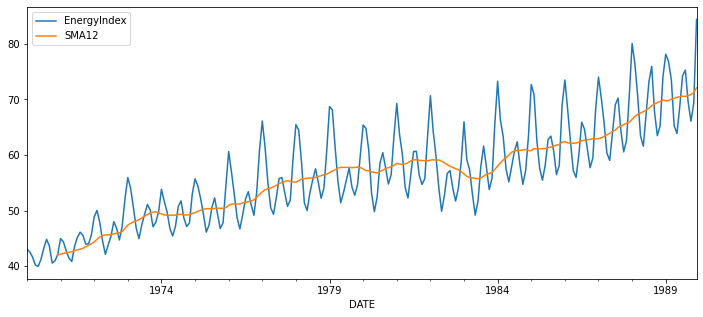

In [6]:
df['SMA12'] = df['EnergyIndex'].rolling(window = 12).mean()
df.plot(figsize = (12, 5));

### 3. Plot the Exponentially Weighted Moving Average (EWMA) with a span of 12 using Simple Exponential Smoothing.

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12 # indicates the length of a cycle
alpha = 2 / (span + 1) # defined formula for alpha
df['EWMA12'] = df['EnergyIndex'].ewm(alpha = alpha, adjust = False).mean()
df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
df.head()

,EnergyIndex,SMA12,EWMA12,SES12
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900
1970-02-01,42.5577,NaN,43.005485,43.005485
1970-03-01,41.6215,NaN,42.792564,42.792564
1970-04-01,40.1982,NaN,42.393431,42.393431
1970-05-01,39.9321,NaN,42.014765,42.014765


EWMA and SES(shift = -1) are essentially the same thing which produce the same results.

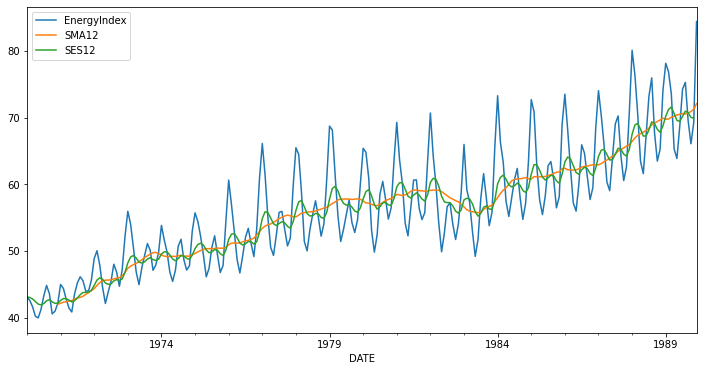

In [8]:
df[['EnergyIndex', 'SMA12', 'SES12']].plot(figsize = (12, 6));

### 4. Plot the Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models.

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues
df.head()

,EnergyIndex,SMA12,EWMA12,SES12,TESmul12
DATE,,,,,
1970-01-01,43.0869,NaN,43.086900,43.086900,43.087098
1970-02-01,42.5577,NaN,43.005485,43.005485,41.068160
1970-03-01,41.6215,NaN,42.792564,42.792564,39.724746
1970-04-01,40.1982,NaN,42.393431,42.393431,37.961977
1970-05-01,39.9321,NaN,42.014765,42.014765,38.600728


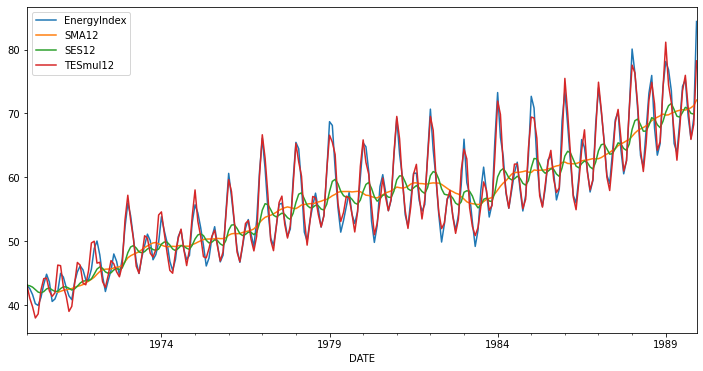

In [10]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].plot(figsize = (12, 6));

Triple exponential smoothing has far outperformed simple moving average and simple exponential smoothing.

### 5: Zoom in on the first and last 24 months.

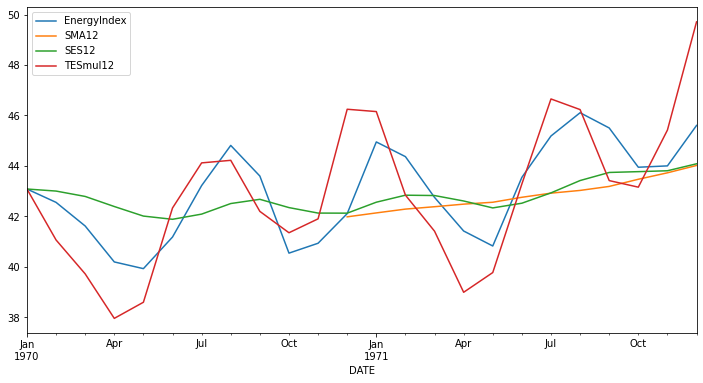

In [11]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']][:24].plot(figsize = (12, 6));

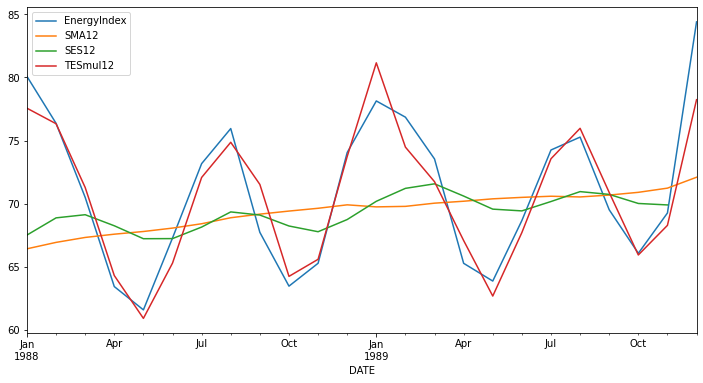

In [12]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']][-24:].plot(figsize = (12, 6));